# <font style="color:rgb(0,91,150)">Anota√ß√µes em Imagens</font>


O primeiro passo para come√ßarmos a trabalhar com imagens √© carregar as bibliotecas. Aqui, vamos usar algumas velhas conhecidas, e tamb√©m o OpenCV.


In [2]:
# importando as bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

Para ler imagens, vamos armazenar a mesma em uma vari√°vel, e carregar com `cv2.imread`. Esse processo √© parecido com a forma que carregamos datasets em csv.

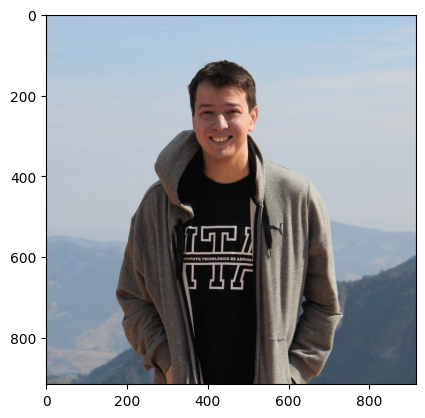

In [3]:
# ler imagem
img = cv2.imread("images/carlos.jpg")

# visualizando a imagem
plt.imshow(img[...,::-1])

Temos que lembrar que uma imagem √© um array de pixels, distribu√≠dos em canais. Por isso recebemos esses 3 n√∫meros abaixo.

Portanto, lemos que a nossa imagem tem 915 pixels de altura e de largura, e 3 canais.

In [4]:
# verificando as dimens√µes da imagem
img.shape

(915, 915, 3)

Abaixo, podemos ver a quantidade total de pixels que comp√µem a nossa imagem.

In [5]:
img[20, 20]

array([220, 195, 169], dtype=uint8)

Assim como fazemos com datasets em CSV, √© interessante criar c√≥pias para fazer manipula√ß√µes, por isso, vamos criar uma c√≥pia da nossa imagem antes das manipula√ß√µes.

As altera√ß√µes feitas no OpenCV s√£o feitas como que se fosse `inplace`. Por isso, √© vital que tenhamos uma c√≥pia, para que tenhamos esse checkpoint.

In [6]:
# criando uma c√≥pia
img_cp = img.copy()

A primeira coisas que vamos fazer √© desenhar um ret√¢ngulo. Para isso, vamos usar a fun√ß√£o `rectangle`, que toma como argumentos a imagem que ser√° manipulada, o ponto de in√≠cio, ponto de t√©rmino, cor do ret√¢ngulo e grossura do mesmo.

Com isso, temos o resultado abaixo.

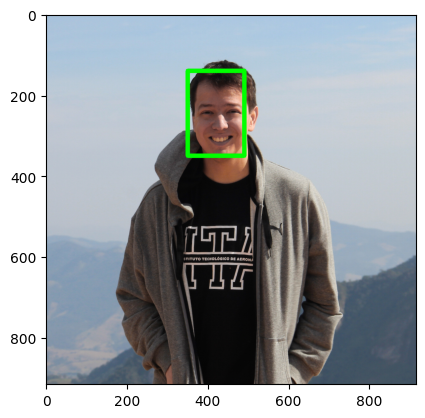

In [7]:
# imagem, ponto de inicio, ponto de termino, cor do retangulo, grossura
cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 10)

plt.imshow(img_cp[...,::-1])

Por fim, vamos escrever em cima da imagem. Isso seria √∫til, novamente, em um projeto que identifique pessoas ou objetos, por exemplo.

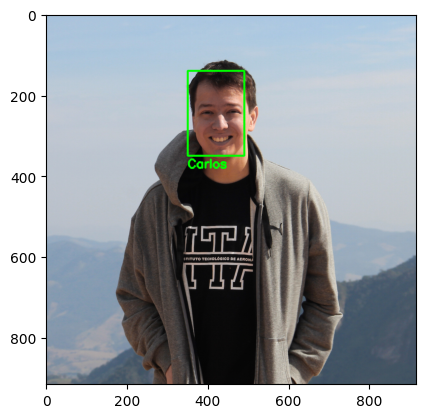

In [8]:
# fazer copia da imagem
img_cp = img.copy()

# desenhar retangulo
cv2.rectangle(img_cp, (350, 140), (490, 350), (0, 255, 0), 3)

# colocar texto por cima
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_cp, 'Carlos', (350, 380), font, 1, (0, 255, 0), 3)

plt.imshow(img_cp[...,::-1])

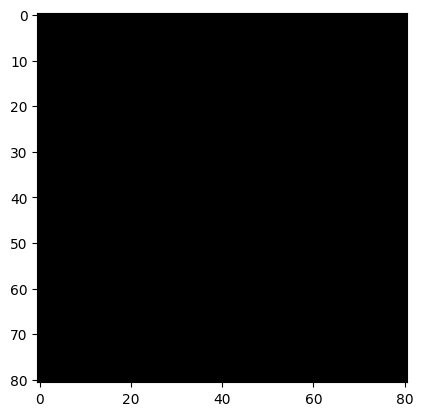

In [9]:
# criar uma imagem
carlos_image = np.zeros((81,81), dtype=np.uint8)
plt.imshow(carlos_image, cmap='gray')

## Desenhar uma Imagem

Da mesma forma que fizemos na aula anterior, podemos desenhar em cima dessa imagem que criamos.

Como estamos tratando de um array, n√≥s podemos tamb√©m utilizar **slicing** para definir as posi√ß√µes onde iremos desenhar.

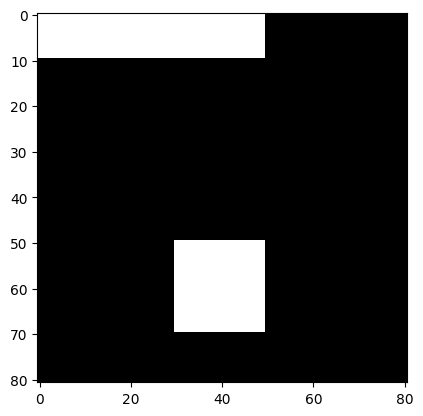

In [10]:
# desenhar na imagem
carlos_image[0:10, 0:50] = 255
carlos_image[50:70, 30:50] = 255
plt.imshow(carlos_image, cmap='gray')

In [11]:
# ver as dimens√µes
print(carlos_image.shape)

(81, 81)


## Converter para BGR

Por padr√£o , o OpenCV utiliza a escala RGB ao contr√°rio. Na imagem que criamos anteriormente, temos apenas dois canais. Mas √© poss√≠vel converter uma imagem com 2 canais para 3, na escala RGB, ou BGR, no caso do OpenCV.

Para fazer convers√µes, precisamos buscar dentro do OpenCV o esquema de cores que queremos converter. Pode ser um pouco desafiador no come√ßo, ent√£o a dica √© usar o auto complete, para buscar o que voc√™ precisa.

(81, 81, 3)


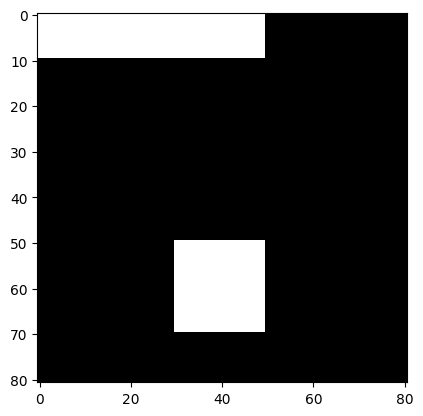

In [12]:
# convertendo a imagem para BGR
carlos_image = cv2.cvtColor(carlos_image, cv2.COLOR_GRAY2BGR)
plt.imshow(carlos_image, cmap='gray')
print(carlos_image.shape)

Acima, podemos ver que apesar de n√£o ter mudado nada na representa√ß√£o da imagem, ao verificar o shape, verificamos que agora a imagem tem 3 canais.

## Converter Para Outro Tipo de Arquivo (PNG <-> JPG)

Outra funcionalidade interessante √© a convers√£o de formato de imagem. O OpenCV reconhece diversos formatos diferentes, e com isso, conseguimos usar o `imwrite` direto para salvar o arquivo em um novo formato.

In [13]:
# convertendo o formato da imagem
cv2.imwrite('images/foto_nova.jpg', carlos_image)

True

## Carregar Imagem em Grayscale

Por padr√£o, o OpenCV carrega imagens utilizando 3 canais, mesmo que o arquivo tenha sido criado e salvo em grayscale, por exemplo, com um √∫nico canal, ao abrirmos a imagem dentro do OpenCV, ele a abre com 3 canais (BGR).

Caso queiramos abrir ela em Grayscale, assim como foi criada, precisamos abrir utilizando um m√≥dulo espec√≠fico para isso. `cv2.IMREAD_GRAYSCALE` ap√≥s o path da imagem.

## Modos do `cv2.imread`

Abaixo, segue uma lista de modos √∫teis para leitura de arquivos com o OpenCV.

- cv2.IMREAD_COLOR
	- 3 canais de cores (BGR), com 8-bit value (0-255)
- cv2.IMREAD_GRAYSCALE
	- 8-bit grayscale image
- cv2.IMREAD_ANYCOLOR
	- Dependente do metadado da imagem. Pode retornar 8-bit por canal BGR ou 8-bit grayscale
- cv2.IMREAD_UNCHANGED
	- L√™ todos os dados da image, incluindo o canal alpha, se existir.
- cv2.IMREAD_REDUCED_GRAYSCALE_2 / 4 / 8
	- Carrega uma imagem na metade da resolu√ß√£o original, em grayscale
- cv2.IMREAD_REDUCED_COLOR_2  / 4 / 8
	- Carrega uma imagem na metade da resolu√ß√£o original, em BGR.

## Transforma√ß√µes Geom√©tricas

Redimensionar imagens tamb√©m √© necess√°rio ao se trabalhar com Vis√£o Computacional. Isso pode ser feito de forma simples, como colocamos abaixo.

Se voc√™ quiser saber um pouco mais sobre *interpolation*, vamos deixar aqui um [link](https://www.cambridgeincolour.com/tutorials/image-interpolation.htm) de refer√™ncia sobre o assunto.

### Escala
A primeira manipula√ß√£o que faremos nesse sentido √© a mudan√ßa de escala. Isso √© √∫til para que aumentar ou diminuir o tamanho de uma imagem.

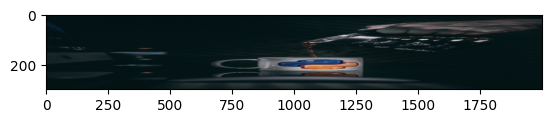

In [21]:
# valores absolutos
image = cv2.imread('images/cafe.png')
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_image[...,::-1])

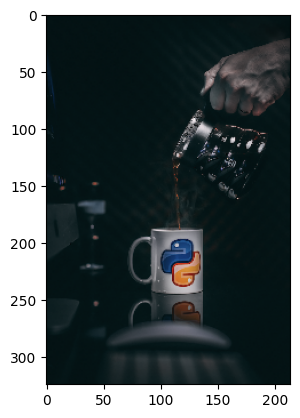

In [22]:
# ratio
dst_image = cv2.resize(image, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
plt.imshow(dst_image[...,::-1])

- **Interpola√ß√£o**
	- Aumentar a imagem
		- Geralmente, a melhor abordagem √© cv2.INTER_CUBIC ou CV2.INTER_LINEAR
	- Diminuir a imagem
		- Geralmente, a melhor abordagem √© usar cv2.INTER_LINEAR

### Translation

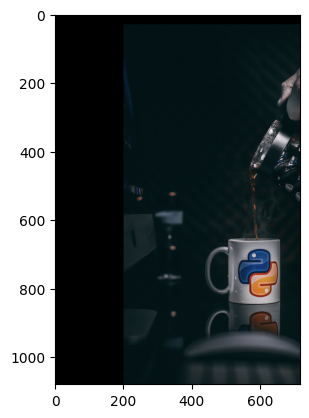

In [23]:
# translation
height, width = image.shape[:2]
M = np.float32([[1, 0, 200], [0, 1, 30]])
dst_image = cv2.warpAffine(image, M, (width, height))
plt.imshow(dst_image[...,::-1])

In [24]:
# merge
image_copy =cv2.merge((b, g, r))

NameError: name 'b' is not defined

### Rota√ß√£o

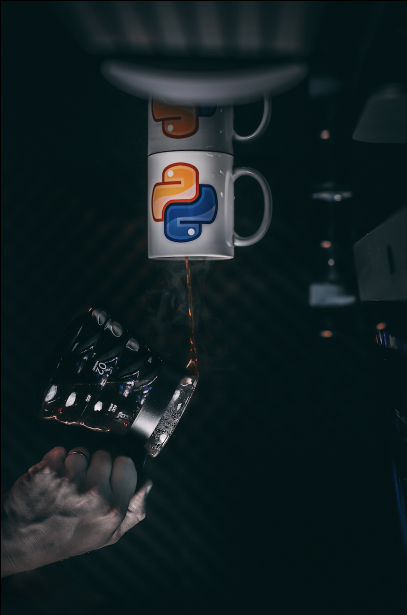

In [ ]:
# rotacao
height, width = image.shape[:2]
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))
cv2_imshow(dst_image)

### Cropping

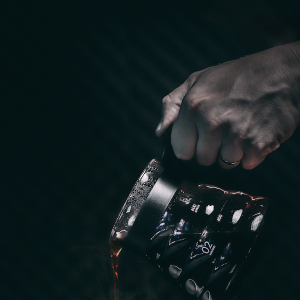

In [ ]:
# cropping an image
cropped_image = image[0:300, 100:400, :]
cv2_imshow(cropped_image)

## Filtros e Opera√ß√µes Aritm√©ticas

O filtro na verdade √© uma pequena matriz que usamos para deixar a imagem mais n√≠tida ou borrada, por exemplo. Para fazer isso, precisamos fazer uma opera√ß√£o de convolu√ß√£o.

Vamos ver, na pr√°tica o que seria uma convolu√ß√£o, em termos simples.

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O pr√≥ximo passo √© fazer uma opera√ß√£o de convolu√ß√£o com filtro 3x3. O produto final desse processo de convolu√ß√£o ser√° uma matriz 4x4. N√≥s calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como voc√™ pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Ap√≥s avaliar a e excpress√£o acima n√≥s obtemos o resulto de -5. Esse ser√° o valor do pixel naquela posi√ß√£o na nossa imagem com o filtro aplicado. Ent√£o, n√≥s vamos movendo o filtro ao longo da imagem e vamos criando a imagem pronta.

Note que o nosso filtro √© uma matriz com a mesma altura e largura (3√ó3, 5√ó5, 9√ó9). Sempre usamos n√∫meros √≠mparespois precisamos ter um pixel ao centro dessa matriz.

Agora que temos uma intui√ß√£o de como a matriz funciona, vamos ver ela em a√ß√£o na pr√°tica.


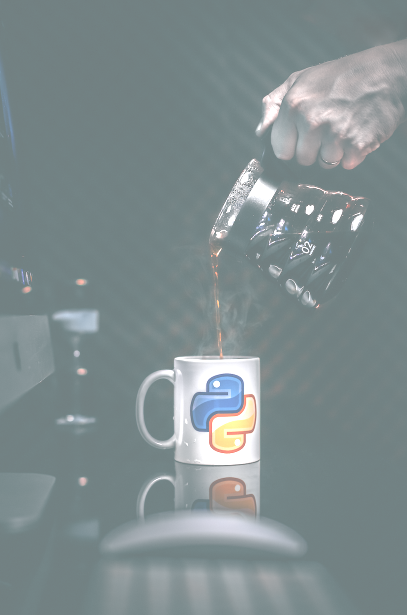

In [ ]:
# utilizando o ones do numpy para criar o filtro
filtro_1 = np.ones(image.shape, dtype=np.uint8) * 110

# aplicando o filtro √† imagem
somada = cv2.add(image, filtro_1)

# mostrando a imagem com filtro
cv2_imshow(somada)

Esse primeiro filtro nos permitiu aumentar o brilho em toda a imagem, pois adicionamos o valor do filtro √† nossa imagem original.

Para escurecer a imagem, vamos fazer a opera√ß√£o contr√°ria, diminuindo os valor dos nossos pixels.

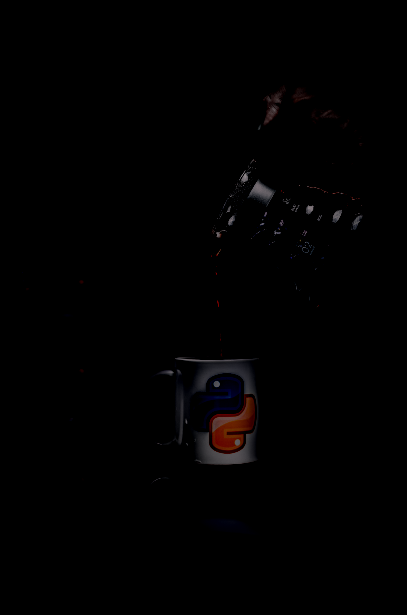

In [ ]:
# criando filtro
filtro_2 = np.ones(image.shape, dtype=np.uint8) * 110

# aplicando filtro
subtraida = cv2.subtract(image, filtro_1)

# imagem com filtro
cv2_imshow(subtraida)

### Blurring
Nas opera√ß√µes acima, n√≥s est√°vamos tratando apenas de um canal, o que n√£o √© o mais comum quando lidamos com imagens, que normalmente est√£o no padr√£o **RGB** (Red, Blue, Green). Por isso, precisamos de outra forma de lidar com essas imagens.

Quando pensamos em canais como sendo uma "vis√£o" da imagem como um todo, dando √™nfase ou escondendo determinadas partes de acordo com as caracter√≠sticas de cada canal.


<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distin√ß√£o de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel s√£o praticamente intercambi√°veis, mas em geral, quando falamos de mais canais, eles s√£o bem diferentes.

Cada filtro, na verdade, √© uma cole√ß√£o de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo √∫nico. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma vers√£o processada de cada um. √â importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em √™nfases em determinados canais, ou um canal ser mais sens√≠vel a mudan√ßas que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Ent√£o, cada uma das vers√µes processadas por cada canal s√£o somadas, formando um canal √∫nico. Os kernels de um filtro produzem uma vers√£o para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um vi√©s, peso. A forma que o *bias* funciona √© que cada output de filtro possui um vi√©s. Esse vi√©s √© adicionado ao canal obtido como output at√© agora e produz o output final do canal.

Portanto, quando falamos em qualquer n√∫mero de filtros, a forma de trabalho ser√° id√™ntica: Cada filtro processa o input por si s√≥, juntamos diferentes conjuntos de kernels com um vi√©s atrav√©s do processo descrito acima, produzindo um canal de output √∫nico. Ent√£o, eles s√£o concatenados para produzir um output geral final, com o n√∫mero de canais sendo o n√∫mero de filtros. Normalmente, tamb√©m √© aplicada uma n√£o-linearidade passando esse input por outra camada de convolu√ß√£o, o que repete o processo.

Vamos ver como isso funciona na pr√°tica.


In [ ]:
# # kernels arbitr√°rios
# kernel = np.array([[1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9]])

# kernel_image = cv2.filter2D(image, -1, kernel)

# cv2_imshow(kernel_image)

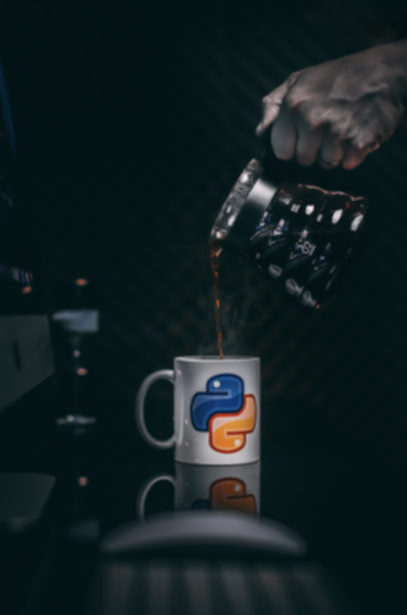

In [ ]:
# criando o kernel
kernel_blur = np.ones((3,3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# mostrando a imagem com filtro
cv2_imshow(blurred)

Aqui, podemos ver o resultado do filtro, que foi utilizado para emba√ßar a imagem.

Tamb√©m podemos aumentar a "for√ßa" desse efeito, mudando o par√¢metro pelo qual a matriz √© dividida.

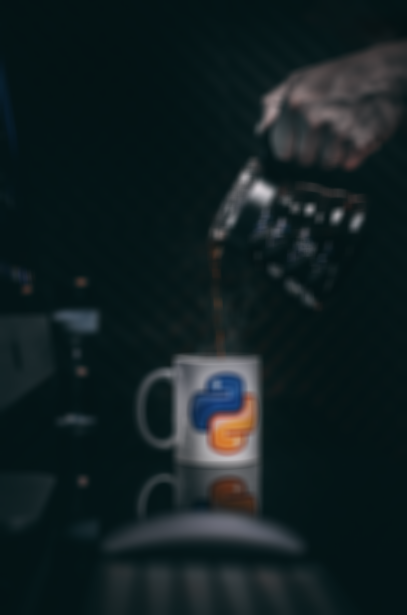

In [ ]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# verificando o resultado
cv2_imshow(blurred)

Como podemos ver, a foto est√° bem mais emba√ßada com o nosso filtro mais forte.

### Gaussian Blur

Outra forma de aplicar um *blur*, um emba√ßado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro √© um pouco mais complexo, mas √© o tipo de kernel mais usado para processamento de imagens.

Para a cria√ß√£o desse filtro n√≥s usamos a **Fun√ß√£o Gaussiana**. Essa fun√ß√£o representa a probabilidade de eventos serem centrdos ao redor do valor da m√©dia. Al√©m disso, o desvio padr√£o (ùúé) dessa fun√ß√£o controla qu√£o ampla ser√° essa distribui√ß√£o. Ao tirar amostras de valores dessa fun√ß√£o, n√≥s consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padr√£o podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

Agora que temos uma intui√ß√£o no assunto, vamos ver como tudo isso fica na pr√°tica.



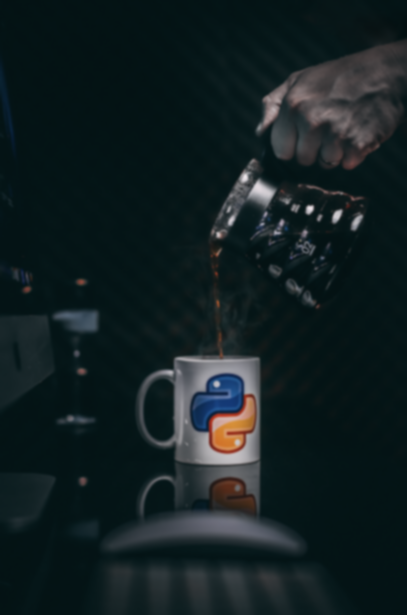

In [ ]:
# utilizando o GaussianBlur, que j√° √© implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(image, (5,5), 0)

# visualizando a imagem
cv2_imshow(gaussian_blurred)

Agora que sabemos o que acontece por tr√°s, podemos usar sem medo essa implementa√ß√£o simples e direta que o OpenCV proporciona, sem muito trabalho, e com apenas uma linha de c√≥digo.

### Motion Blur

Da mesma forma que implementamos o blur acima, tamb√©m podemos implementar um outro tipo de emba√ßado, o *Motion Blur*.

Motion significa movimento, ent√£o esse emba√ßado vai buscar agir de forma a acrescentar um emba√ßado que passe a impress√£o de movimento na imagem.

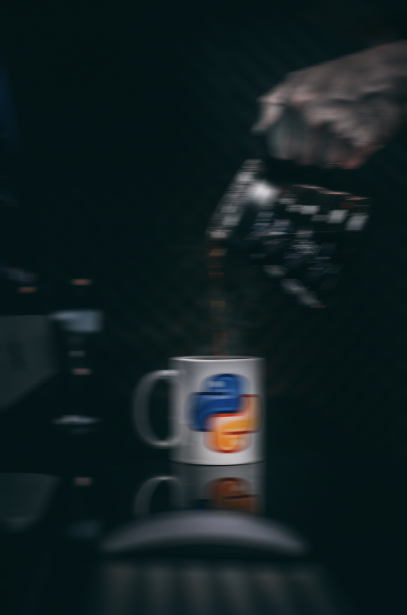

In [ ]:
# implementando o filtro
kernel_motion_blur = np.zeros((15, 15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(image, -1, kernel_motion_blur)

# plotando a imagem
cv2_imshow(motion_blurred)

### Sharpening

O contr√°rio de emba√ßar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse √© o conceito do *Sharpening*.

Nosso objetivo aqui √© exatamente esse, melhorar a nitidez, deixar a imagem menos emba√ßada. Para isso, tamb√©m podemos usar o OpenCV.

O processo de sharpening √© usado, normalmente, para melhorar os "limites" dentro da imagem, os *edges*. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, mas uma delas pode ser vista aqui embaixo:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

Abaixo, podemos ver essa implementa√ß√£o em forma de c√≥digo, onde criamos o array que representa esse filtro de sharpening. Esse filtro tem um centro positivo de 9 e todos os outros pontos possuem o valor -1.

Para esse tipo de filtro, n√≥s n√£o temos uma implementa√ß√£o oficial do OpenCV. Por isso, vamos usar a fun√ß√£o `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por n√≥s, arbitrariamente. Esse filtro √© comumente usado para fazer sharpening em imagens coloridas.

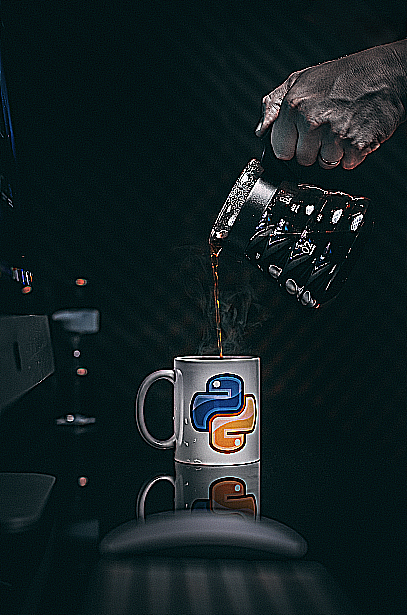

In [ ]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1,-1,-1],
                                [-1,9,-1],
                                [-1,-1,-1]])

# implementando o filtro
sharpened = cv2.filter2D(image, -1, kernel_sharpening_1)

# mostrando a imagem
cv2_imshow(sharpened)

### Bitwise Operations


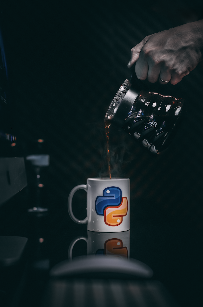

(307, 203, 3)


In [ ]:
redu_image = cv2.imread('cafe.png', cv2.IMREAD_REDUCED_COLOR_4)
cv2_imshow(redu_image)
print(redu_image.shape)

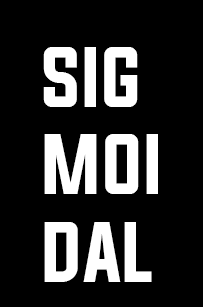

In [ ]:
mask_image = cv2.imread("/content/mascara_sigmoidal.png")
cv2_imshow(mask_image)

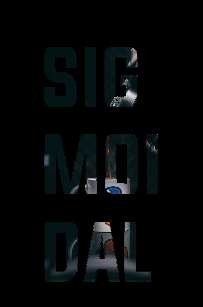

In [ ]:
# bitwise AND
bitwise_and = cv2.bitwise_and(redu_image, mask_image)
cv2_imshow(bitwise_and)

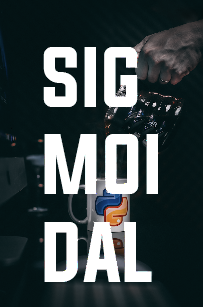

In [ ]:
# bitwise OR
bitwise_or = cv2.bitwise_or(redu_image, mask_image)
cv2_imshow(bitwise_or)

mask_image.shape